In [42]:
import pandas as pd

#Librerías para cálculo y gráficas:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

'es_ES.UTF-8'

# Estancia media por comunidades autónomas y provincias.

In [43]:
df_Media_CA_Pro = pd.read_csv(r"../Data/2065.csv", sep='\t') #Estancia media por comunidades autónomas y provincias.

In [44]:
df_Media_CA_Pro.drop(columns=['Totales Territoriales'], inplace=True)

In [45]:
df_Media_CA_Pro['Periodo'] = pd.to_datetime(df_Media_CA_Pro['Periodo'].str.replace('M', '-'), format='%Y-%m').dt.to_period('M')

In [46]:
df_Media_CA_Pro

,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total
0,NaN,NaN,2025-03,"2,91"
1,NaN,NaN,2025-02,"2,82"
2,NaN,NaN,2025-01,"2,93"
3,NaN,NaN,2024-12,"2,75"
4,NaN,NaN,2024-11,"2,8"
...,...,...,...,...
19840,19 Melilla,NaN,1999-05,"3,3"
19841,19 Melilla,NaN,1999-04,"4,4"
19842,19 Melilla,NaN,1999-03,"3,7"
19843,19 Melilla,NaN,1999-02,3


In [47]:
df_Media_CA_Pro['Provincias'].unique()

array([nan, '04 Almería', '11 Cádiz', '14 Córdoba', '18 Granada',
       '21 Huelva', '23 Jaén', '29 Málaga', '41 Sevilla', '22 Huesca',
       '44 Teruel', '50 Zaragoza', '35 Palmas, Las',
       '38 Santa Cruz de Tenerife', '05 Ávila', '09 Burgos', '24 León',
       '34 Palencia', '37 Salamanca', '40 Segovia', '42 Soria',
       '47 Valladolid', '49 Zamora', '02 Albacete', '13 Ciudad Real',
       '16 Cuenca', '19 Guadalajara', '45 Toledo', '08 Barcelona',
       '17 Girona', '25 Lleida', '43 Tarragona', '03 Alicante/Alacant',
       '12 Castellón/Castelló', '46 Valencia/València', '06 Badajoz',
       '10 Cáceres', '15 Coruña, A', '27 Lugo', '32 Ourense',
       '36 Pontevedra', '01 Araba/Álava', '48 Bizkaia', '20 Gipuzkoa'],
      dtype=object)

In [48]:
df_Media_CA_Pro['Provincias'].unique().size

44

In [49]:
df_Media_CA_Pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19845 entries, 0 to 19844
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype    
---  ------                            --------------  -----    
 0   Comunidades y Ciudades Autónomas  19530 non-null  object   
 1   Provincias                        13545 non-null  object   
 2   Periodo                           19845 non-null  period[M]
 3   Total                             19844 non-null  object   
dtypes: object(3), period[M](1)
memory usage: 620.3+ KB


In [50]:
df_Media_CA_Pro['Total'] = df_Media_CA_Pro['Total'].str.replace(',', '.')
df_Media_CA_Pro['Total'] = pd.to_numeric(df_Media_CA_Pro['Total'], errors='coerce')



In [51]:
df_Media_CA_Pro

,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total
0,NaN,NaN,2025-03,2.91
1,NaN,NaN,2025-02,2.82
2,NaN,NaN,2025-01,2.93
3,NaN,NaN,2024-12,2.75
4,NaN,NaN,2024-11,2.80
...,...,...,...,...
19840,19 Melilla,NaN,1999-05,3.30
19841,19 Melilla,NaN,1999-04,4.40
19842,19 Melilla,NaN,1999-03,3.70
19843,19 Melilla,NaN,1999-02,3.00


In [52]:
df_Media_CA_Pro[df_Media_CA_Pro['Total'].isna()]

,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total
6672,07 Castilla y León,05 Ávila,2020-06,NaN
6673,07 Castilla y León,05 Ávila,2020-05,NaN
7302,07 Castilla y León,24 León,2020-06,NaN
7303,07 Castilla y León,24 León,2020-05,NaN
7617,07 Castilla y León,34 Palencia,2020-06,NaN
7618,07 Castilla y León,34 Palencia,2020-05,NaN
8247,07 Castilla y León,40 Segovia,2020-06,NaN
8248,07 Castilla y León,40 Segovia,2020-05,NaN
9192,07 Castilla y León,49 Zamora,2020-06,NaN
9193,07 Castilla y León,49 Zamora,2020-05,NaN


# Viajeros y pernoctaciones según país de residencia del viajero

In [53]:
df_Pais_Residencia = pd.read_csv(r"../Data/2038.csv", sep='\t') #Viajeros y pernoctaciones según país de residencia del viajero

In [54]:
df_Pais_Residencia['Países'].unique()

array([nan, 'Residentes en España', 'Residentes en el Extranjero',
       'Alemania', 'Austria', 'Bélgica', 'Dinamarca', 'Finlandia',
       'Francia', 'Grecia', 'Irlanda', 'Italia', 'Luxemburgo',
       'Países Bajos', 'Polonia', 'Portugal', 'República Checa', 'Suecia',
       'Resto de la U.E.', 'Noruega', 'Reino Unido', 'Rusia', 'Suiza',
       'Otros Países Europeos', 'África', 'UE28 sin España',
       'UE27_2020 sin España', 'Resto del Mundo'], dtype=object)

In [55]:
df_Pais_Residencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20160 entries, 0 to 20159
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   RESIDENCIA/ORIGEN          20160 non-null  object
 1   Países                     17010 non-null  object
 2   Viajeros y pernoctaciones  20160 non-null  object
 3   Periodo                    20160 non-null  object
 4   Total                      19022 non-null  object
dtypes: object(5)
memory usage: 787.6+ KB


In [56]:
df_Pais_Residencia['Periodo'] = pd.to_datetime(df_Pais_Residencia['Periodo'].str.replace('M', '-'), format='%Y-%m').dt.to_period('M')

In [57]:
df_Pais_Residencia['Total'] = df_Pais_Residencia['Total'].str.replace('.', '')  # Elimina los separadores de miles
df_Pais_Residencia['Total'] = df_Pais_Residencia['Total'].str.replace(',', '.')  # Convierte los decimales
df_Pais_Residencia['Total'] = pd.to_numeric(df_Pais_Residencia['Total'], errors='coerce')  # Convierte a float


In [58]:
df_Pais_Residencia

,RESIDENCIA/ORIGEN,Países,Viajeros y pernoctaciones,Periodo,Total
0,Total,NaN,Viajero,2025-03,7680722.0
1,Total,NaN,Viajero,2025-02,6539960.0
2,Total,NaN,Viajero,2025-01,5776075.0
3,Total,NaN,Viajero,2024-12,6553489.0
4,Total,NaN,Viajero,2024-11,7171221.0
...,...,...,...,...,...
20155,Asia (sin Japón),NaN,Pernoctaciones,1999-05,25427.0
20156,Asia (sin Japón),NaN,Pernoctaciones,1999-04,26878.0
20157,Asia (sin Japón),NaN,Pernoctaciones,1999-03,24271.0
20158,Asia (sin Japón),NaN,Pernoctaciones,1999-02,18530.0


In [59]:
df_Pais_Residencia[df_Pais_Residencia['Total'].isna()]

,RESIDENCIA/ORIGEN,Países,Viajeros y pernoctaciones,Periodo,Total
1947,Total,Alemania,Viajero,2020-06,NaN
1948,Total,Alemania,Viajero,2020-05,NaN
2262,Total,Alemania,Pernoctaciones,2020-06,NaN
2263,Total,Alemania,Pernoctaciones,2020-05,NaN
2577,Total,Austria,Viajero,2020-06,NaN
...,...,...,...,...,...
20083,Asia (sin Japón),NaN,Pernoctaciones,2005-05,NaN
20084,Asia (sin Japón),NaN,Pernoctaciones,2005-04,NaN
20085,Asia (sin Japón),NaN,Pernoctaciones,2005-03,NaN
20086,Asia (sin Japón),NaN,Pernoctaciones,2005-02,NaN


# Viajeros y pernoctaciones por comunidades autónomas y provincias

In [60]:
df_CA_Pro = pd.read_csv(r"../Data/2074.csv", sep='\t', dtype={2: str}) #Viajeros y pernoctaciones por comunidades autónomas y provincias

In [61]:
df_CA_Pro.drop(columns=['Residencia: Nivel 1'], inplace=True)

df_CA_Pro.rename(columns={'Residencia: Nivel 2': 'Residencia'}, inplace=True)


df_CA_Pro

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Viajeros y pernoctaciones,Residencia,Periodo,Total
0,Total Nacional,NaN,NaN,Viajero,NaN,2025M03,7.680.722
1,Total Nacional,NaN,NaN,Viajero,NaN,2025M02,6.539.960
2,Total Nacional,NaN,NaN,Viajero,NaN,2025M01,5.776.075
3,Total Nacional,NaN,NaN,Viajero,NaN,2024M12,6.553.489
4,Total Nacional,NaN,NaN,Viajero,NaN,2024M11,7.171.221
...,...,...,...,...,...,...,...
132295,Total Nacional,19 Melilla,NaN,Pernoctaciones,Residentes en el Extranjero,1999M05,1.305
132296,Total Nacional,19 Melilla,NaN,Pernoctaciones,Residentes en el Extranjero,1999M04,1.668
132297,Total Nacional,19 Melilla,NaN,Pernoctaciones,Residentes en el Extranjero,1999M03,1.673
132298,Total Nacional,19 Melilla,NaN,Pernoctaciones,Residentes en el Extranjero,1999M02,1.487


In [62]:
df_CA_Pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132300 entries, 0 to 132299
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Totales Territoriales             132300 non-null  object
 1   Comunidades y Ciudades Autónomas  130410 non-null  object
 2   Provincias                        94500 non-null   object
 3   Viajeros y pernoctaciones         132300 non-null  object
 4   Residencia                        88200 non-null   object
 5   Periodo                           132300 non-null  object
 6   Total                             132290 non-null  object
dtypes: object(7)
memory usage: 7.1+ MB


In [63]:
df_CA_Pro['Periodo'] = pd.to_datetime(df_CA_Pro['Periodo'].str.replace('M', '-'), format='%Y-%m').dt.to_period('M')

In [64]:
df_CA_Pro['Total'] = df_CA_Pro['Total'].str.replace('.', '')  # Elimina los separadores de miles
df_CA_Pro['Total'] = df_CA_Pro['Total'].str.replace(',', '.')  # Convierte los decimales
df_CA_Pro['Total'] = pd.to_numeric(df_CA_Pro['Total'], errors='coerce')  # Convierte a float

In [65]:
df_CA_Pro[df_CA_Pro['Total'].isna()]

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Viajeros y pernoctaciones,Residencia,Periodo,Total
8217,Total Nacional,01 Andalucía,14 Córdoba,Viajero,Residentes en el Extranjero,2022-12,NaN
45417,Total Nacional,07 Castilla y León,05 Ávila,Viajero,NaN,2020-06,NaN
45418,Total Nacional,07 Castilla y León,05 Ávila,Viajero,NaN,2020-05,NaN
45732,Total Nacional,07 Castilla y León,05 Ávila,Viajero,Residentes en España,2020-06,NaN
45733,Total Nacional,07 Castilla y León,05 Ávila,Viajero,Residentes en España,2020-05,NaN
...,...,...,...,...,...,...,...
131413,Total Nacional,19 Melilla,NaN,Pernoctaciones,NaN,2020-05,NaN
131727,Total Nacional,19 Melilla,NaN,Pernoctaciones,Residentes en España,2020-06,NaN
131728,Total Nacional,19 Melilla,NaN,Pernoctaciones,Residentes en España,2020-05,NaN
132042,Total Nacional,19 Melilla,NaN,Pernoctaciones,Residentes en el Extranjero,2020-06,NaN


## Gráficas estancia media por comunidad autónoma y provincia

In [66]:
#Asignamos "Balears" a la provincia de la comunidad autónoma

condicion = df_Media_CA_Pro['Comunidades y Ciudades Autónomas'] == '04 Balears, Illes'
df_Media_CA_Pro.loc[condicion, 'Provincias'] = df_Media_CA_Pro.loc[condicion, 'Comunidades y Ciudades Autónomas']

#Conversión de valores
df_Media_CA_Pro['Total'] = pd.to_numeric(df_Media_CA_Pro['Total'], errors='coerce')  # Convierte a float
df_Media_CA_Pro['Provincias'] = df_Media_CA_Pro['Provincias'].str.replace(r'^\d+\s+', '', regex=True)
df_Media_CA_Pro['Comunidades y Ciudades Autónomas'] = df_Media_CA_Pro['Comunidades y Ciudades Autónomas'].str.replace(r'^\d+\s+', '', regex=True)
df_Media_CA_Pro['Periodo_dt'] = df_Media_CA_Pro['Periodo'].dt.to_timestamp()

df_Media_CA_Pro[condicion]

,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total,Periodo_dt
4725,"Balears, Illes","Balears, Illes",2025-03,4.28,2025-03-01
4726,"Balears, Illes","Balears, Illes",2025-02,3.72,2025-02-01
4727,"Balears, Illes","Balears, Illes",2025-01,3.52,2025-01-01
4728,"Balears, Illes","Balears, Illes",2024-12,2.97,2024-12-01
4729,"Balears, Illes","Balears, Illes",2024-11,3.36,2024-11-01
...,...,...,...,...,...
5035,"Balears, Illes","Balears, Illes",1999-05,7.60,1999-05-01
5036,"Balears, Illes","Balears, Illes",1999-04,7.50,1999-04-01
5037,"Balears, Illes","Balears, Illes",1999-03,7.30,1999-03-01
5038,"Balears, Illes","Balears, Illes",1999-02,8.60,1999-02-01


In [67]:
df_Media_CA_Pro

,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total,Periodo_dt
0,NaN,NaN,2025-03,2.91,2025-03-01
1,NaN,NaN,2025-02,2.82,2025-02-01
2,NaN,NaN,2025-01,2.93,2025-01-01
3,NaN,NaN,2024-12,2.75,2024-12-01
4,NaN,NaN,2024-11,2.80,2024-11-01
...,...,...,...,...,...
19840,Melilla,NaN,1999-05,3.30,1999-05-01
19841,Melilla,NaN,1999-04,4.40,1999-04-01
19842,Melilla,NaN,1999-03,3.70,1999-03-01
19843,Melilla,NaN,1999-02,3.00,1999-02-01


In [68]:
df_Media_CA_Pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19845 entries, 0 to 19844
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Comunidades y Ciudades Autónomas  19530 non-null  object        
 1   Provincias                        13860 non-null  object        
 2   Periodo                           19845 non-null  period[M]     
 3   Total                             19831 non-null  float64       
 4   Periodo_dt                        19845 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2), period[M](1)
memory usage: 775.3+ KB


In [69]:
df_Media_CA_Pro_periodo = df_Media_CA_Pro[(df_Media_CA_Pro['Periodo'] >= '2022-01')
                                          & (df_Media_CA_Pro['Periodo'] <= '2024-12')
                                          & ((df_Media_CA_Pro['Provincias'] == 'Girona') |
                                             (df_Media_CA_Pro['Provincias'] == 'Málaga') |
                                             (df_Media_CA_Pro['Provincias'] == 'Madrid') |
                                             (df_Media_CA_Pro['Provincias'] == 'Sevilla') |
                                             (df_Media_CA_Pro['Provincias'] == 'Barcelona') |
                                             (df_Media_CA_Pro['Provincias'] == 'Valencia/València') |
                                             (df_Media_CA_Pro['Provincias'] == 'Balears, Illes'))]
df_Media_CA_Pro_periodo

,Comunidades y Ciudades Autónomas,Provincias,Periodo,Total,Periodo_dt
2523,Andalucía,Málaga,2024-12,3.05,2024-12-01
2524,Andalucía,Málaga,2024-11,3.21,2024-11-01
2525,Andalucía,Málaga,2024-10,3.63,2024-10-01
2526,Andalucía,Málaga,2024-09,3.80,2024-09-01
2527,Andalucía,Málaga,2024-08,3.97,2024-08-01
...,...,...,...,...,...
13894,Comunitat Valenciana,Valencia/València,2022-05,2.37,2022-05-01
13895,Comunitat Valenciana,Valencia/València,2022-04,2.36,2022-04-01
13896,Comunitat Valenciana,Valencia/València,2022-03,2.13,2022-03-01
13897,Comunitat Valenciana,Valencia/València,2022-02,1.95,2022-02-01


In [70]:
df_Media_CA_Pro_periodo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 2523 to 13898
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Comunidades y Ciudades Autónomas  216 non-null    object        
 1   Provincias                        216 non-null    object        
 2   Periodo                           216 non-null    period[M]     
 3   Total                             216 non-null    float64       
 4   Periodo_dt                        216 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2), period[M](1)
memory usage: 10.1+ KB


In [71]:
df_Media_CA_Pro_periodo.isna().sum()

Comunidades y Ciudades Autónomas    0
Provincias                          0
Periodo                             0
Total                               0
Periodo_dt                          0
dtype: int64

In [72]:
sns.set_style('darkgrid')

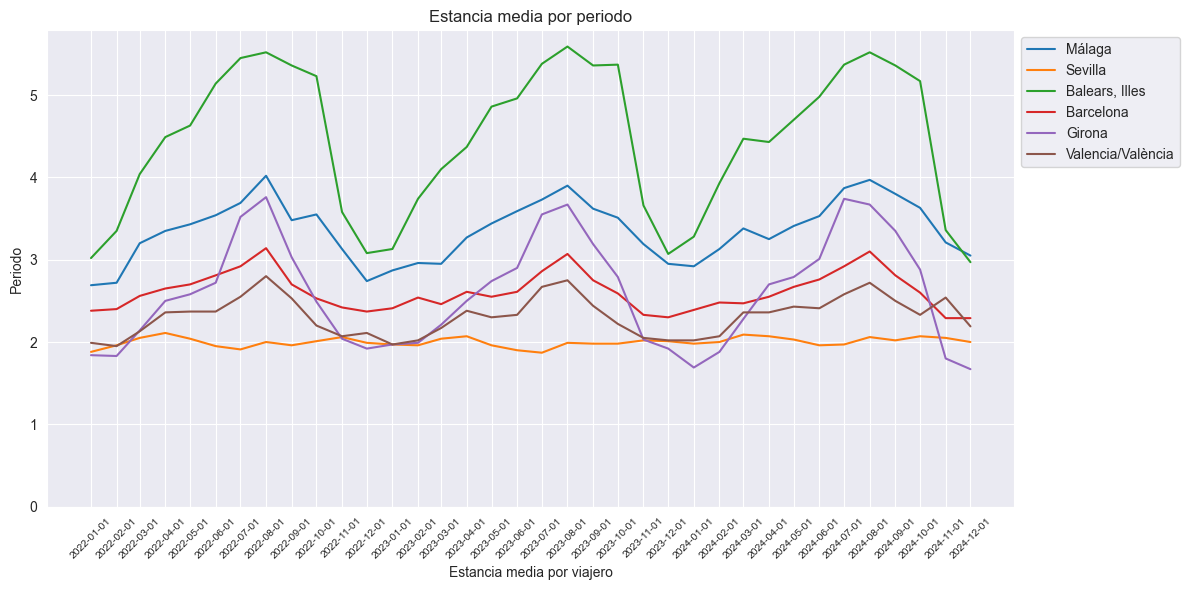

In [78]:
plt.figure(figsize=(12, 6)) 

g = sns.lineplot(data=df_Media_CA_Pro_periodo, x='Periodo_dt', y='Total', hue='Provincias')
g.set_title('Estancia media por periodo')
plt.xlabel('Estancia media por viajero')
plt.ylabel('Periodo')
plt.xticks(ticks=df_Media_CA_Pro_periodo['Periodo_dt'].unique(), fontsize=7.5, rotation=45)
plt.ylim(0, None)
plt.legend(bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()


/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_9964/3496704329.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Media_CA_Pro_periodo['Periodo_dt'] = pd.to_datetime(df_Media_CA_Pro_periodo['Periodo_dt'])


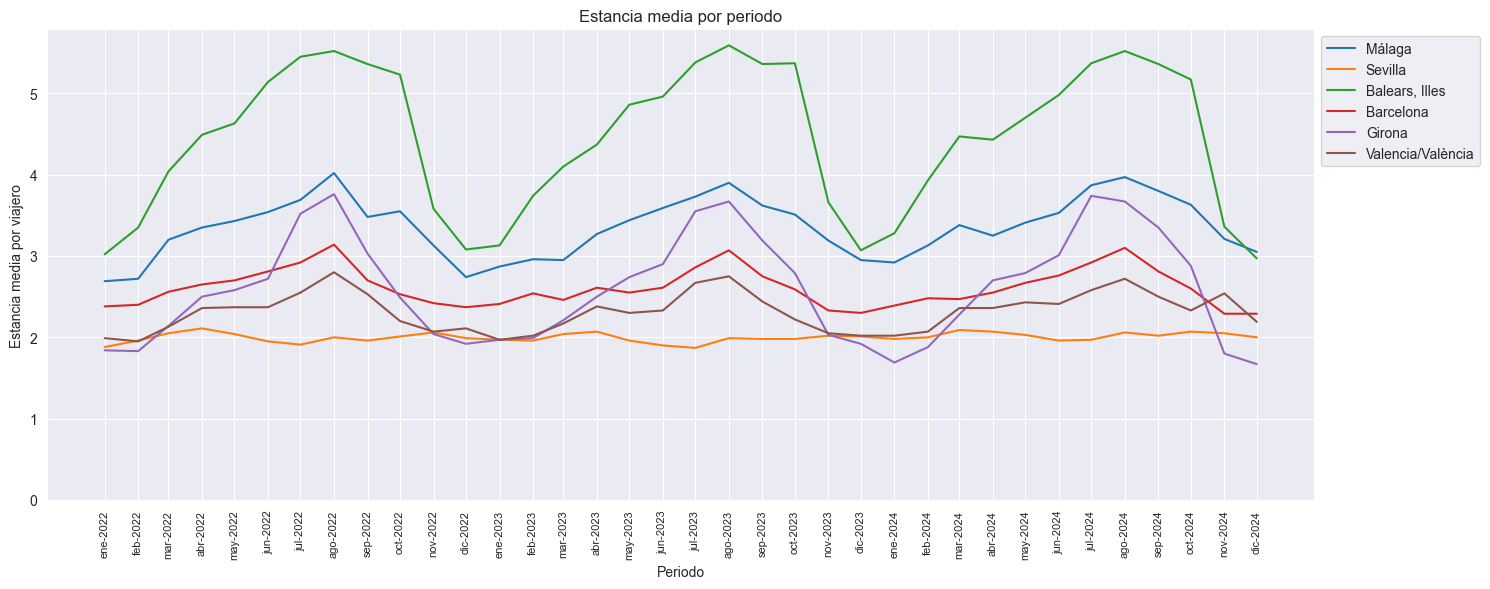

In [ ]:
# Diccionario de meses en español
meses_es = {
    1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
    7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
}

# Asegurarse de que 'Periodo_dt' es datetime
df_Media_CA_Pro_periodo['Periodo_dt'] = pd.to_datetime(df_Media_CA_Pro_periodo['Periodo_dt'])

# Crear figura con tamaño personalizado (ancho, alto)
plt.figure(figsize=(12, 6))

# Gráfico de líneas
g = sns.lineplot(
    data=df_Media_CA_Pro_periodo,
    x='Periodo_dt',
    y='Total',
    hue='Provincias'
)

# Obtener los ticks actuales del eje x
ax = plt.gca()
ticks = ax.get_xticks()

# Formatear manualmente las etiquetas en español
labels = []
for tick in ticks:
    fecha = mdates.num2date(tick)  # Convertir número de fecha a objeto datetime
    mes = meses_es[fecha.month]    # Obtener nombre del mes en español
    año = fecha.year
    labels.append(f"{mes} {año}")

# Aplicar las etiquetas personalizadas
ax.set_xticks(ticks)  # Mantener los ticks originales
ax.set_xticklabels(labels, rotation=45, fontsize=7.5)

# Títulos y ajustes
g.set_title('Estancia media por periodo')
plt.xlabel('Periodo')
plt.ylabel('Estancia media por viajero')
plt.ylim(0, None)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Ajustar layout para evitar cortes
plt.tight_layout()


/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_9964/2474793746.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Media_CA_Pro_periodo['Periodo_dt'] = pd.to_datetime(df_Media_CA_Pro_periodo['Periodo_dt'])


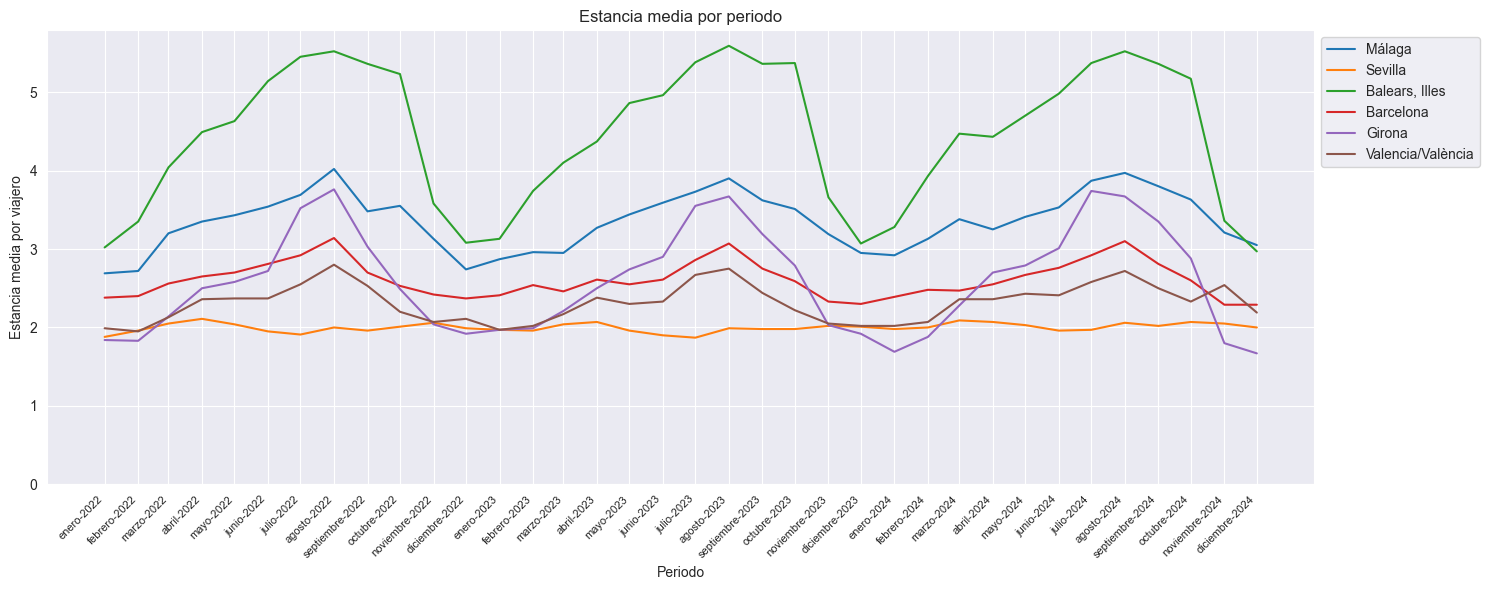

In [ ]:
# Diccionario de meses en español
meses_es = {
    1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
    7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
}

# Asegurar que 'Periodo_dt' es datetime
df_Media_CA_Pro_periodo['Periodo_dt'] = pd.to_datetime(df_Media_CA_Pro_periodo['Periodo_dt'])

# Extraer fechas únicas y ordenarlas
fechas_unicas = sorted(df_Media_CA_Pro_periodo['Periodo_dt'].unique())

# Crear figura con tamaño ajustable (ancho, alto)
plt.figure(figsize=(15, 6)) 

# Gráfico de líneas
g = sns.lineplot(
    data=df_Media_CA_Pro_periodo,
    x='Periodo_dt',
    y='Total',
    hue='Provincias'
)

# Configurar ticks manualmente
ax = plt.gca()
ax.set_xticks(fechas_unicas)  # Fuerza a mostrar todas las fechas

# Formatear etiquetas en español (ej: "abr-2024")
labels = [f"{meses_es[fecha.month]}-{fecha.year}" for fecha in fechas_unicas]
ax.set_xticklabels(labels, rotation=45, fontsize=8, ha='right', )

# Ajustes adicionales
g.set_title('Estancia media por periodo')
plt.xlabel('Periodo')
plt.ylabel('Estancia media por viajero')
plt.ylim(0, None)
plt.legend(bbox_to_anchor=(1.0, 1.0))

# Ajuste automático para evitar cortes
plt.tight_layout()
plt.show()

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_9964/915672339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Media_CA_Pro_periodo['Mes'] = df_Media_CA_Pro_periodo['Periodo_dt'].dt.month


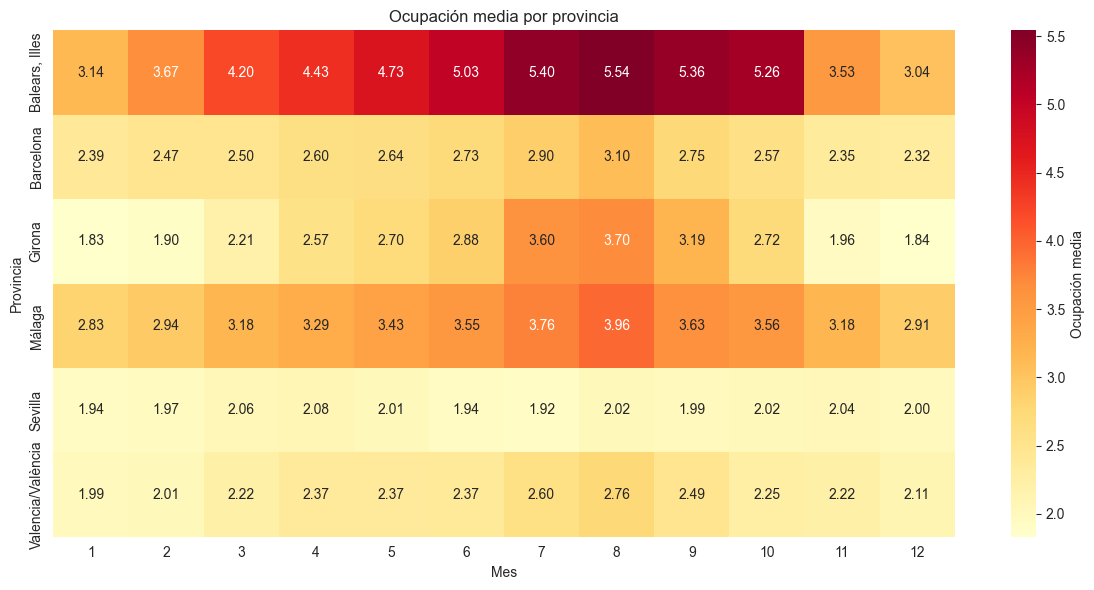

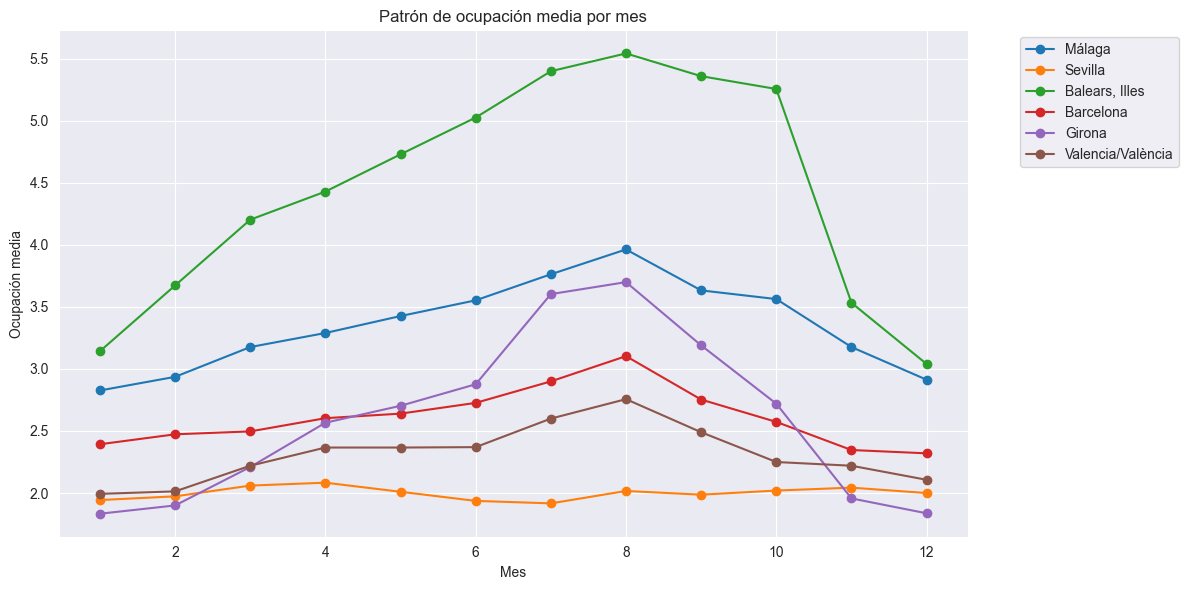

Estadísticas por temporada:
                             mean   std
Provincias        Temporada            
Balears, Illes    Invierno   3.29  0.34
                  Otoño      4.72  0.89
                  Primavera  4.45  0.27
                  Verano     5.32  0.24
Barcelona         Invierno   2.40  0.08
                  Otoño      2.56  0.18
                  Primavera  2.58  0.08
                  Verano     2.91  0.17
Girona            Invierno   1.86  0.11
                  Otoño      2.62  0.56
                  Primavera  2.49  0.24
                  Verano     3.39  0.40
Málaga            Invierno   2.89  0.15
                  Otoño      3.46  0.23
                  Primavera  3.30  0.16
                  Verano     3.76  0.19
Sevilla           Invierno   1.97  0.04
                  Otoño      2.02  0.04
                  Primavera  2.05  0.04
                  Verano     1.96  0.06
Valencia/València Invierno   2.04  0.07
                  Otoño      2.32  0.19
            

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_9964/915672339.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Media_CA_Pro_periodo['Temporada'] = df_Media_CA_Pro_periodo['Mes'].apply(get_season)


In [91]:
# Extraemos el mes
df_Media_CA_Pro_periodo['Mes'] = df_Media_CA_Pro_periodo['Periodo_dt'].dt.month

# Calculamos promedios por mes y provincia
monthly_avg = df_Media_CA_Pro_periodo.groupby(['Provincias', 'Mes'])['Total'].mean().reset_index()

# Heatmap de ocupación promedio por provincia
pivot_data = monthly_avg.pivot(index='Provincias', columns='Mes', values='Total')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='YlOrRd', annot=True, fmt='.2f', cbar_kws={'label': 'Ocupación media'})
plt.title('Ocupación media por provincia')
plt.xlabel('Mes')
plt.ylabel('Provincia')
plt.tight_layout()
plt.show()

# Lineplot para encontrar patrones mensuales
plt.figure(figsize=(12, 6))
for province in df_Media_CA_Pro_periodo['Provincias'].unique():
    province_data = monthly_avg[monthly_avg['Provincias'] == province]
    plt.plot(province_data['Mes'], province_data['Total'], marker='o', label=province)

plt.title('Patrón de ocupación media por mes')
plt.xlabel('Mes')
plt.ylabel('Ocupación media')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cálculo de estadísticas por temporada
print("\
Estadísticas por temporada:")
# Definición de temporada
def get_season(month):
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

df_Media_CA_Pro_periodo['Temporada'] = df_Media_CA_Pro_periodo['Mes'].apply(get_season)

seasonal_stats = df_Media_CA_Pro_periodo.groupby(['Provincias', 'Temporada'])['Total'].agg(['mean', 'std']).round(2)
print(seasonal_stats)